# Marcel Afandi
# Tugas Assignment 2

In [2]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
NYC_rolling = pd.read_csv("D:\\\\semester 6\\satu\\Tgs Assignment\\data\\nyc-rolling-sales.csv")

Melihat 5 data teratas

In [4]:
NYC_rolling.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Melihat 5 data terbawah

In [5]:
NYC_rolling.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


# Prepocessing

In [6]:
#mengubah isi kolom "BOROUGH" dari angka menjadi nama kota

In [7]:
NYC_rolling['BOROUGH']= NYC_rolling['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
NYC_rolling.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
NYC_rolling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  object
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Mengecek jumlah shape yang digunakan di dataset

In [9]:
NYC_rolling.shape

(84548, 22)

In [10]:
NYC_rolling.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [11]:
NYC_rolling.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Drop kolom yang tidak relevan

In [12]:
NYC_rolling.drop(["Unnamed: 0"], axis=1, inplace=True)

Mengubah tipe data pada beberapa kolom dataset menjadi category

In [13]:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 
               'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    NYC_rolling[col] = NYC_rolling[col].astype("category")

In [14]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    NYC_rolling[col] = pd.to_numeric(NYC_rolling[col], errors='coerce')

Mengecek apakah kolom sudah diubah tipe datanya 

In [15]:
NYC_rolling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  int64   
 5   LOT                             84548 non-null  int64   
 6   EASE-MENT                       84548 non-null  object  
 7   BUILDING CLASS AT PRESENT       84548 non-null  category
 8   ADDRESS                         84548 non-null  object  
 9   APARTMENT NUMBER                84548 non-null  object  
 10  ZIP CODE                        84548 non-null  category
 11  RESIDENTIAL UNITS               84548 non-null  int64   
 12  COMMERCIAL UNITS  

Melihat apakah ada Missing Value pada dataset

In [16]:
NYC_rolling.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Shape telah berubah karena kita telah menghapus kolom Unnamed

In [17]:
NYC_rolling.shape

(84548, 21)

Melakukan plot menggunakan boxplot untuk melihat harga jual unit yang harganya lebih dari 200000  dan kurang dari 500000

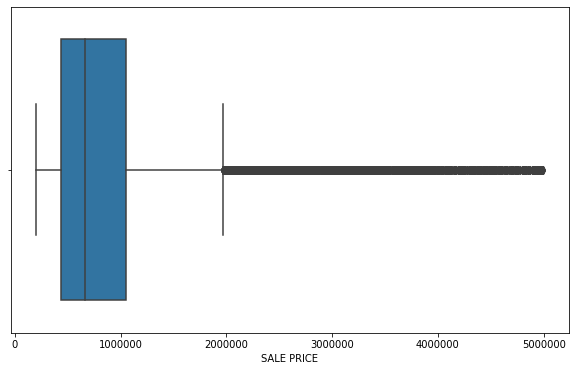

In [18]:
NYC_rolling=NYC_rolling[(NYC_rolling['SALE PRICE'] > 200000) & (NYC_rolling['SALE PRICE'] < 5000000)]

plt.figure(figsize=(10,6))
sns.boxplot(x='SALE PRICE', data=NYC_rolling)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# Measure of Central Tendency

## Mean 

Mencari nilai mean dari kolom Residential Units, Commercial units, dan Total units maka didapatkan nilainya

In [19]:
RES = statistics.mean(NYC_rolling['RESIDENTIAL UNITS'])

In [20]:
COM = statistics.mean(NYC_rolling['COMMERCIAL UNITS'])

In [21]:
TOT = NYC_rolling['TOTAL UNITS'].mean()

In [22]:
print('Residdential Unit    : ', RES)
print('Commercial Unit      : ', COM)
print('Total Unit           : ', TOT)

Residdential Unit    :  1.260281480611506
Commercial Unit      :  0.1065045902088594
Total Unit           :  1.372227768316793


## Median

Berikut adalah masing-masing nilai tengah dari setiap kolom

In [23]:
brg = statistics.median(NYC_rolling['BOROUGH'])
gsf = statistics.median(NYC_rolling['NEIGHBORHOOD'])
lsf = statistics.median(NYC_rolling['BUILDING CLASS CATEGORY'])
print([brg, gsf, lsf])

['Manhattan', 'JAMAICA ESTATES', '07 RENTALS - WALKUP APARTMENTS             ']


In [24]:
med = NYC_rolling[['BOROUGH', 'SALE PRICE', 'BLOCK']].groupby('BOROUGH').median().sort_values(by=['SALE PRICE','BLOCK'], ascending=True)
med

,SALE PRICE,BLOCK
BOROUGH,,
Bronx,469887.5,4445.0
Staten Island,480000.0,3159.0
Queens,555000.0,5938.0
Brooklyn,807550.0,4167.0
Manhattan,999999.0,1184.0


## Mode

Berikut adalah nilai yang sering muncul dari kolom NEIGHBORHOOD dan didapatkan FLUSHING-NORTH

In [25]:
NEI = statistics.mode(NYC_rolling['NEIGHBORHOOD'])
print('NEIGHBORHOOD : ', NEI)

NEIGHBORHOOD :  FLUSHING-NORTH


In [26]:
mod = NYC_rolling[['BOROUGH', 'TOTAL UNITS']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
mod

,BOROUGH,TOTAL UNITS
0,Bronx,2
1,Brooklyn,1
2,Manhattan,0
3,Queens,1
4,Staten Island,1


# Measure of Spread

## Range

Brikut adalah range dari total units, dan hasilnya adalah 2261

In [27]:
range_col = np.max(NYC_rolling['TOTAL UNITS']) - np.min(NYC_rolling["TOTAL UNITS"])

In [28]:
print("Rangge pada kolom TOTAL UNITS adalah: ", range_col)

Rangge pada kolom TOTAL UNITS adalah:  2261


Contoh lain yaitu untuk mencari rata-rata harga jual 

In [29]:
print('Range SALE PRICE = ', (NYC_rolling['SALE PRICE'].max() - NYC_rolling['SALE PRICE'].min()))

Range SALE PRICE =  4796822.0


## Variance

In [30]:
VAR = NYC_rolling['SALE PRICE'].var(ddof=1)
print("Number of Variance dari SALE PRICE adalah:", VAR)

Number of Variance dari SALE PRICE adalah: 605952192430.8915


## Standard Deviation

Untuk melakukan standard deviation hampir sama dengan variance namun ada sedikit perbedaan pada codenya, yang mana pada standard deviation perlu dikalikan dengan 0.5 atau dengan angka lain untuk mendapatkan hasilnya

In [31]:
std = NYC_rolling['SALE PRICE'].var(ddof=1)**0.5
print("Standard Deviation dari SALE PRICE adalah:", std)

Standard Deviation dari SALE PRICE adalah: 778429.3111329323


## Probability Distribution

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7732\4034128367.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(br['SALE PRICE'],


[Text(0.5, 1.0, 'Distribution of Sale Price in Queens')]

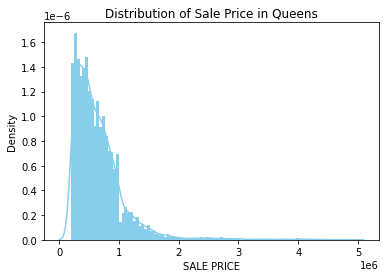

In [32]:
df1 = NYC_rolling.groupby("BOROUGH")
br = df1.get_group('Queens')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(title='Distribution of Sale Price in Queens')

## Confidence Intervals

In [33]:
co_in = NYC_rolling.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
co_in

SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          5.950942e+05  5.645773e+05   3780
Brooklyn       1.026914e+06  7.580787e+05  13862
Manhattan      1.395280e+06  1.029309e+06  12202
Queens         6.598507e+05  4.502104e+05  15827
Staten Island  5.293508e+05  2.851099e+05   5416

In [34]:
co_in1 = co_in.iloc[2,0]
sd = co_in.iloc[2,1]
n = co_in.iloc[2,2]
z = 1.96
se = sd / np.sqrt(n)

In [35]:
print('upper limit in CI-Square: ', co_in1 + z * se)
print('lower limit in CI-Square: ', co_in1 - z * se)

upper limit in CI-Square:  1413544.0119614322
lower limit in CI-Square:  1377016.8203611379


## Hypotesis Testing

In [36]:
NYC_rolling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51087 entries, 3 to 84545
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         51087 non-null  category
 1   NEIGHBORHOOD                    51087 non-null  category
 2   BUILDING CLASS CATEGORY         51087 non-null  category
 3   TAX CLASS AT PRESENT            51087 non-null  category
 4   BLOCK                           51087 non-null  int64   
 5   LOT                             51087 non-null  int64   
 6   EASE-MENT                       51087 non-null  object  
 7   BUILDING CLASS AT PRESENT       51087 non-null  category
 8   ADDRESS                         51087 non-null  object  
 9   APARTMENT NUMBER                51087 non-null  object  
 10  ZIP CODE                        51087 non-null  category
 11  RESIDENTIAL UNITS               51087 non-null  int64   
 12  COMMERCIAL UNITS  

In [37]:
data_Borough = NYC_rolling.groupby('BOROUGH', axis=0).sum() #Menggroupkan dataset ke kolom Borough 
data_Borough

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Bronx,16233853,574863,7601,393,7992,10199170.0,9000154.0,2.249456e+09
Brooklyn,57768591,5307078,21373,1189,22599,24379319.0,22013356.0,1.423508e+10
Manhattan,13749852,8759992,7361,248,7748,902070.0,3693826.0,1.702521e+10
Queens,106091316,3910363,21301,3152,24561,38875491.0,24629798.0,1.044346e+10
Staten Island,18247718,1050460,6748,459,7203,26270913.0,10320439.0,2.866964e+09


In [38]:
#Memilih dua wilayah
bronx = NYC_rolling[NYC_rolling['BOROUGH'] == 'Bronx'] 
brooklyn = NYC_rolling[NYC_rolling['BOROUGH'] == 'Brooklyn']

In [39]:
total_bronx = data_Borough.iloc[1,4] 
mean_bronx = bronx['SALE PRICE'].mean() # Mean dari bronx dan sale price
std_bronx = bronx['SALE PRICE'].std() # Standard Deviation dari bronx dan sale price
total_bronx, mean_bronx, std_bronx

(22599, 595094.219047619, 564577.2553694778)

In [40]:
total_brooklyn = data_Borough.iloc[2,4]
mean_brooklyn = brooklyn['SALE PRICE'].mean() # Mean dari bronx dan sale price
std_brooklyn = brooklyn['SALE PRICE'].std() # Standard Deviation dari bronx dan sale price
total_brooklyn, mean_brooklyn, std_brooklyn

(7748, 1026914.1887894964, 758078.6895717157)

In [43]:
from statsmodels.stats.weightstats import ztest # import library ztes dari weighstats
ztest, pvalue= ztest(bronx['SALE PRICE'],brooklyn['SALE PRICE']) #Berguna untuk melihat ztest dari bronx dan brooklyn 
print("pvalue: ", float(pvalue)) #mencetak nilai pvalue yang isinya dari pvalue diatas
if pvalue < 0.5: #jika pvalue < 0.05 maka diReject jika tidak maka diaccept
    print("Reject null Hypotesis")
else:
    print("accept null hypotesis")

pvalue:  1.1201999952194741e-233
Reject null Hypotesis
